 # Single Neuro Logistic Regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the palmerpenguins dataset into a pandas DataFrame object
df = pd.read_csv("seeds.csv")

In [5]:
df.dropna(inplace = True)
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


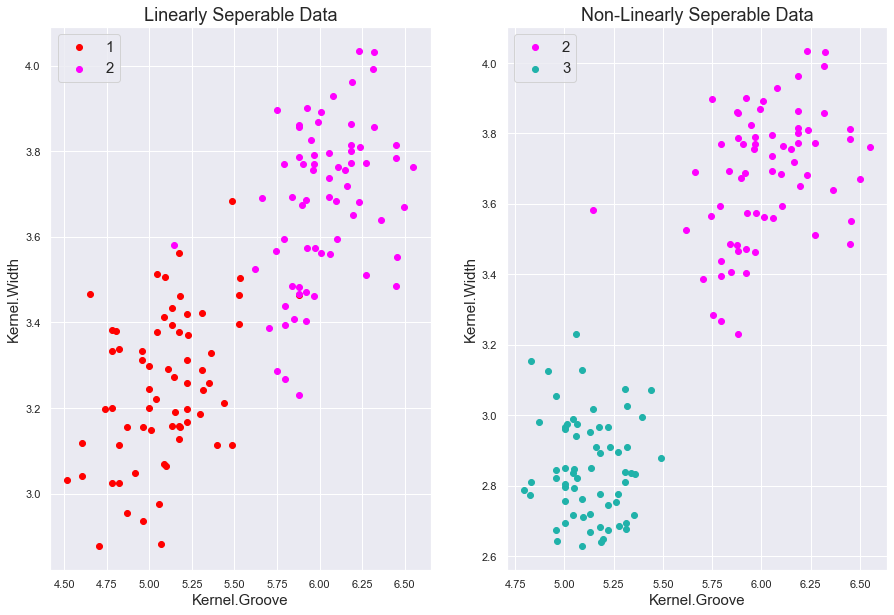

In [33]:
sns.set_theme()

w1 = df[df.Type == 1]
w2 = df[df.Type == 2]
w3 = df[df.Type == 3]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(w1['Kernel.Groove'], 
            w1['Kernel.Width'], 
            color = "red", 
            label = "1")
ax1.scatter(w2['Kernel.Groove'], 
            w2['Kernel.Width'], 
            color = "magenta", 
            label = "2")
ax1.set_xlabel("Kernel.Groove", fontsize = 15)
ax1.set_ylabel("Kernel.Width", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)


ax2.scatter(w2['Kernel.Groove'], 
            w2['Kernel.Width'], 
            color = "magenta", 
            label = "2")
ax2.scatter(w3['Kernel.Groove'], 
            w3['Kernel.Width'], 
            color = "lightseagreen", 
            label = "3")
ax2.set_xlabel("Kernel.Groove", fontsize = 15)
ax2.set_ylabel("Kernel.Width", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()


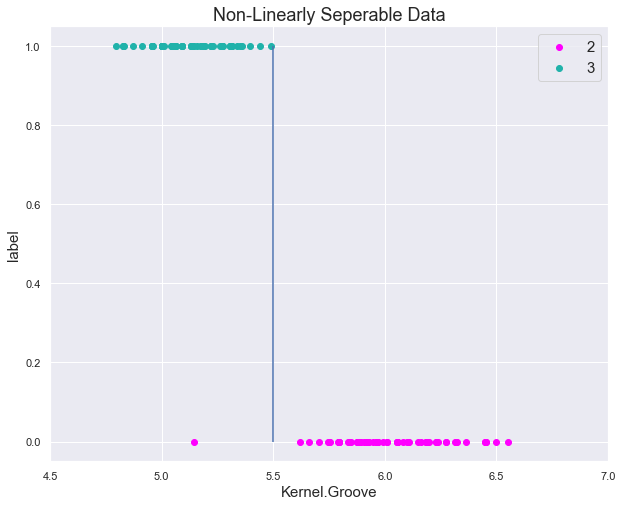

In [37]:
plt.figure(figsize = (10, 8))
plt.xlim((4.5, 7 ))
plt.scatter(w2['Kernel.Groove'], 
            np.zeros(68), 
            color = "magenta", 
            label = "2")
plt.scatter(w3['Kernel.Groove'], 
            np.ones(65), 
            color = "lightseagreen", 
            label = "3")
plt.vlines(5.5, 0.0, 1.0)
plt.xlabel("Kernel.Groove", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

# Designing a Single Neuron to Predict Probabilities

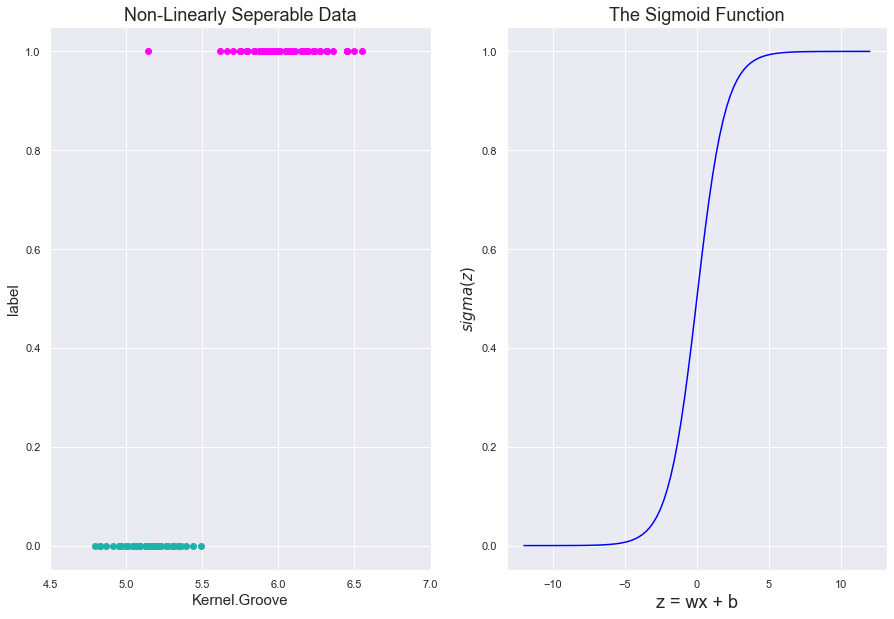

In [39]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((4.5, 7))
ax1.scatter(w3['Kernel.Groove'], 
            np.zeros(65), 
            color = "lightseagreen", 
            label = "3")

ax1.scatter(w2['Kernel.Groove'], 
            np.ones(68), 
            color = "magenta", 
            label = "2")
ax1.set_xlabel("Kernel.Groove", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

As can be seen by the two figures generated above, the petal pre-activation value might be able to map the petal length measurements to the correct inputs to the sigmoid function so that the post-activation values correctly describe the probability of observing a versicolor flower or a virginica flower. In order to test this hypothesis, we must next introduce a cost/loss function to our single neuron model.

# The Binary Cross Entropy Loss Function

In [41]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()


In [42]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df.iloc[88:188]['Kernel.Groove'].values
X = X.reshape(-1, 1)
y = np.where(df.iloc[88:188].Type == 3, 0, 1)

node.train(X, y, alpha = 0.01, epochs = 10_000)


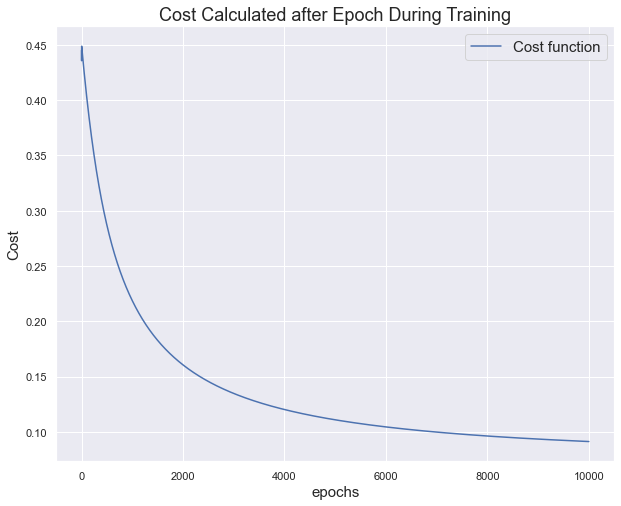

In [43]:
node.plot_cost_function()
plt.show()

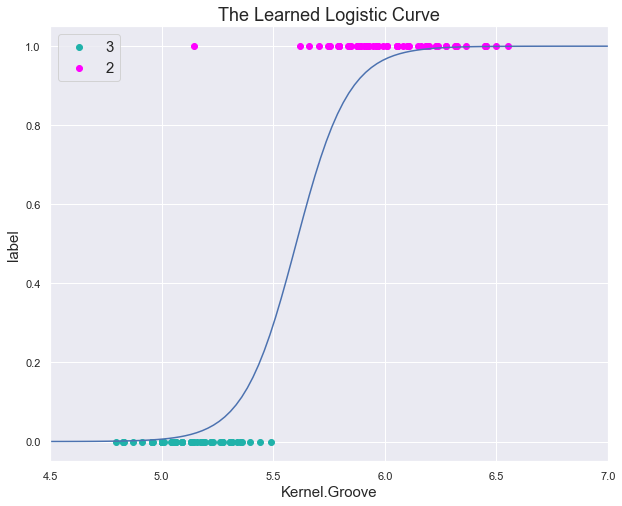

In [45]:
plt.figure(figsize = (10, 8))
plt.xlim((4.5, 7 ))
plt.scatter(w3['Kernel.Groove'], 
            np.zeros(65), 
            color = "lightseagreen", 
            label = "3")

plt.scatter(w2['Kernel.Groove'], 
            np.ones(68), 
            color = "magenta", 
            label = "2")

domain = np.linspace(4.5, 7, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Kernel.Groove", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()


In [48]:
node.predict(X)

array([0.97866445, 0.91150737, 0.99923739, 0.95672622, 0.99548501,
       0.99926905, 0.99664137, 0.98521465, 0.53349038, 0.88003041,
       0.96930281, 0.99512839, 0.99035895, 0.91286692, 0.94122587,
       0.99967896, 0.92247443, 0.83586752, 0.95601804, 0.93883408,
       0.97866445, 0.99766587, 0.99150154, 0.77805849, 0.9929387 ,
       0.9563735 , 0.9977436 , 0.99311499, 0.96980384, 0.70172374,
       0.92889275, 0.02006587, 0.96470681, 0.9858202 , 0.93635153,
       0.9929387 , 0.62224412, 0.95493501, 0.94994171, 0.8370285 ,
       0.8370285 , 0.88870527, 0.95811005, 0.91286692, 0.78097562,
       0.93785211, 0.14699842, 0.20158063, 0.07549748, 0.03786964,
       0.02659901, 0.05859488, 0.01815827, 0.00609874, 0.08100443,
       0.03035004, 0.07549748, 0.05629759, 0.11351099, 0.00604751,
       0.0532234 , 0.03725604, 0.0061504 , 0.03756163, 0.07729382,
       0.07729382, 0.28016764, 0.07609196, 0.00883511, 0.02616306,
       0.00906087, 0.00961012, 0.05629759, 0.09603541, 0.01815

# Logistic Regression Single Neuron with Multiple Inputs

In [49]:
np.rint(node.predict(X)) != y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [50]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.01


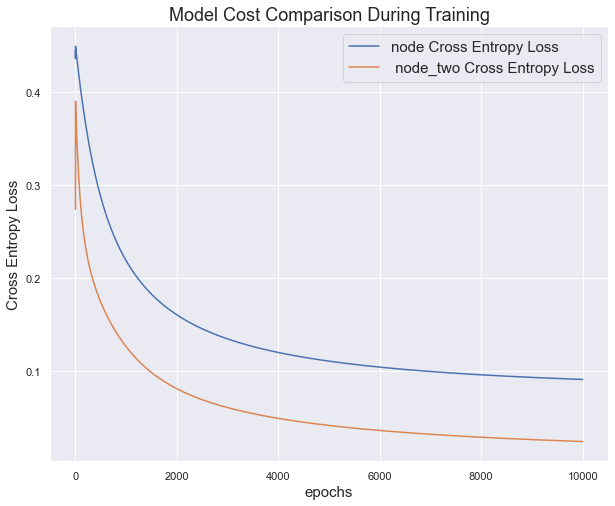

In [46]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_two = df.iloc[88:188][["Kernel.Groove", "Kernel.Width"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.01, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()


As we can see by the figures generated above, using two features results in a lower cost function (in this particular instance) with the same learning rate and number of epochs. Finally, let us visualize the decision boundary generated by the trained weights and bias of node_two by running the following code in the cell below. After running notice that even with the logistic regression single neuron, we are still learning a linearly seperating hyperplane.

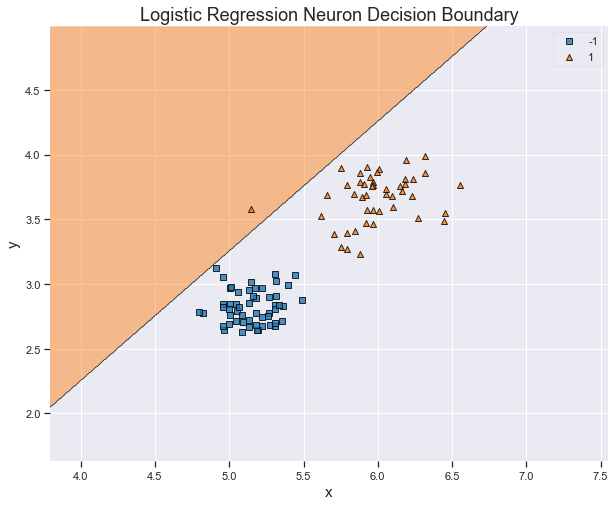

In [47]:
def sign(z):
    return np.sign(z)

def MSE(y_hat, y):
    return .5*(y_hat - y)**2

# Instantiate a new single neuron.
node_three = SingleNeuron(sign, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_three = df.iloc[88:188][["Kernel.Groove", "Kernel.Width"]].values

y_three = np.where(df.iloc[88:188]["Type"] == 3, -1, 1)


# Train the new single neuron model on the new feature vectors.
node_three.train(X_three, y_three, alpha = 0.001, epochs = 5_000)

node_three.plot_decision_boundary(X_three, y_three)
plt.show()